---
title: "Constraint Optimization"
execute:
    echo: False
author: "Vannsh Jani"
date: "9/18/2023"
format:
  html:
    code-fold: true
categories: [OPTIMIZATION]
jupyter: python3
---

# Optimization with constraints

In many real life scenarios when we try to optimize a function, there will be some constraints which we need to keep in mind. constraints can be of two types, equality constraints and inequality constraints.

## Equality Constraints

When we want to let' say optimize a function $f(\text x)$, where x could be a single value or a vector of n-dimensions, but we are subject to m equality constraint as follows

$h_i(\text x)=0 \forall i \in [1,..m]$

Let's better understand this with an example

We want to optimize the function $f(\text x , \text y)=x^2+y^2$, given the equality constraint $h(\text x , \text y)=x+y-1$. So basically we need values of x and y such that they optimize f while also satisfy h.

First we need to figure out if this optimization problem is an maximizing problem or an minimizing problem. For that let's plot f=1 and h.

In [21]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

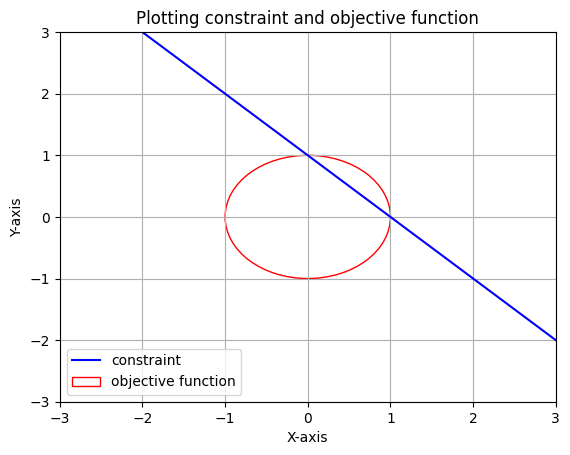

In [38]:
x = np.linspace(-3, 3, 100)
y = 1-x
circle_radius = 1.0
circle_center = (0, 0)

fig, ax = plt.subplots()
ax.plot(x, y, label='constraint',color="blue")
circle = plt.Circle(circle_center, circle_radius, fill=False, color='red', label='objective function')
ax.add_patch(circle)
ax.set_xlim(-3, 3)
ax.set_ylim(-3, 3)

ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_title('Plotting constraint and objective function')
ax.legend(loc="lower left")
ax.grid()
plt.show()


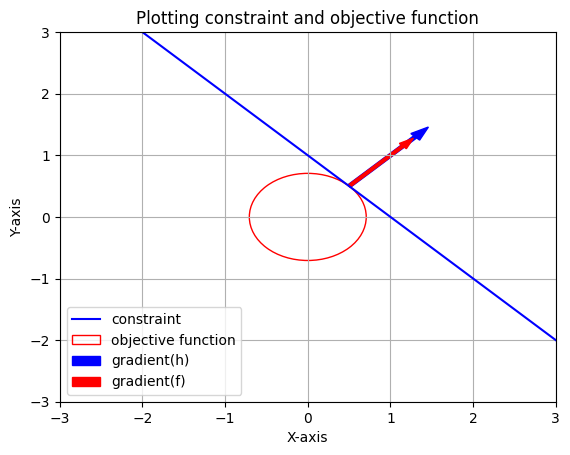

In [95]:
x = np.linspace(-3, 3, 100)
y = 1-x
circle_radius = 1/(2**0.5)
circle_center = (0, 0)

fig, ax = plt.subplots()
ax.plot(x, y, label='constraint',color="blue")
circle = plt.Circle(circle_center, circle_radius, fill=False, color='red', label='objective function')
ax.add_patch(circle)
ax.set_xlim(-3, 3)
ax.set_ylim(-3, 3)

ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_title('Plotting constraint and objective function')
plt.arrow(0.5,0.5,0.8,0.8,color="blue",width=0.05,label="gradient(h)")
plt.arrow(0.5,0.5,0.65,0.65,color="red",width=0.04,label="gradient(f)")
ax.legend(loc="lower left")
ax.grid()
plt.show()


We can see that if we keep increasing the value of f, we will always get intersection points with the line. Hence, f can go upto $\infty$. On the other hand if we decrease the value of f, we can only do it upto an extent or else f will not intersect with h and will not satisfy the constraint. Hence, this is an minimization problem. Clearly the solution to this problem will occur when we keep decreasing f until it becomes tangent to h.

If we consider the gradient of both functions, the gradient of the objective function is given by the red arrow which is the direction in which the function will increase the most with small change in inputs and the gradient of the constraint function is given by the blue arrow. Hence, we can conclude that when these 2 functions are tangent to each other which is the optimal case, $\nabla f(\text x^*,\text y^*) = \lambda \nabla h(\text x^*,\text y^*)$, their gradients at the optimal point are parallel. Here $\text x^*,\text y^*$ are the optimal points.

### Optimizing functions with equality constraints using Lagrangian Multiplier method.

In this method we construct a new function called the Lagrangian denoted by L.

$\text L(\text x,\text y,\lambda)=f(\text x,\text y)+ \lambda h(\text x,\text y)$, $\lambda$ is called the lagrangian multiplier.

We then set $\nabla L = 0$ i.e $\frac {\partial \text L}{\partial \text x}=0, \quad \frac {\partial \text L}{\partial \text y}=0, \quad \frac {\partial \text L}{\partial \lambda}=0$

We then solve for x, y and $\lambda$ using the three equations we get. Notice that $\frac {\partial \text L}{\partial \lambda}=h(\text x,\text y)$.Solving above, the three equations we get are

$$\begin{equation}\begin{split} 2\text x&=\lambda \\ 2\text y&=\lambda \\ \text x + \text y -\text 1&=0 \end{split}\end{equation} $$ 

We can see that since the equations are symmetric in x and y. Hence x must be equal to y = 0.5 and hence optimal solution is (0.5,0.5). Let's visualize this.

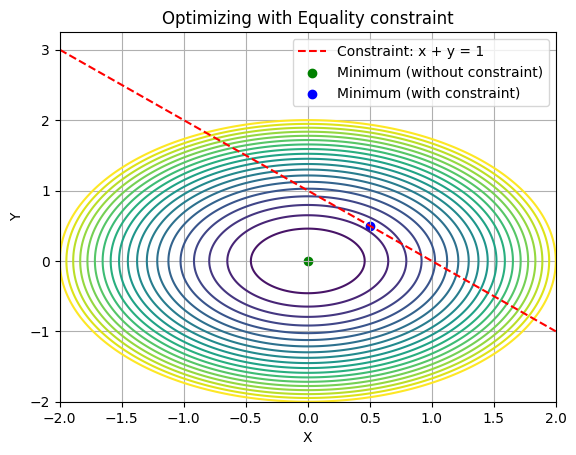

In [24]:
def f(x, y):
    return x**2 + y**2

def h(x, y):
    return x + y - 1  

x = np.linspace(-2, 2, 400)
y = np.linspace(-2, 2, 400)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)
plt.contour(X, Y, Z, levels=np.linspace(0, 4, 20), cmap='viridis')
plt.plot(x, 1 - x, label='Constraint: x + y = 1', color='red', linestyle='--')
plt.scatter(0, 0, color='green', marker='o', label='Minimum (without constraint)')
plt.scatter(0.5, 0.5, color='blue', marker='o', label='Minimum (with constraint)')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.title('Optimizing with Equality constraint')
plt.grid(True)
plt.show()


## KKT Conditions

Our goal is to minimize f(x) such that,

$\begin{equation}\begin{split}\text h_i(\text x)&=0,\hspace{0.1cm} \forall i=1,...m. \\ \text g_i(\text x)&<=0,\hspace{0.1cm} \forall i=1,...n. \end{split}\end{equation}$

Here as constraints we have m equalities and n inequalities. To solve this problem let's first create the Lagragian function L as follows

$\text L(\text x,\lambda_1,...,\lambda_m,\mu_1,...,\mu_n)\hspace{0.1cm}=\hspace{0.1cm}\text f(\text x)+\sum_{i=1}^{m} \lambda_i \text h_i(\text x)+\sum_{j=1}^{n} \mu_j \text g_j(\text x)$

where,
$\lambda_1-\lambda_m$ are multipliers for the m equalities and
$\mu_1-\mu_n$ are multipliers for the n inequalities.

We then equate $\nabla_\text x \text L(\text x,\lambda,\mu)=0.$ This condition is called the stationary condition which minimizes the objective function. We also equate $\nabla_\lambda \text L(\text x,\lambda,\mu)=0.$ which is the equality condition.

Let's try to understand the inequality constraint with an example.

Let f(x,y) = $\text x^2 + \text y^2$ and let g(x) = $5-\text x-\text y$ and g(x)$<=0$. Let's consider f(x,y)=1.

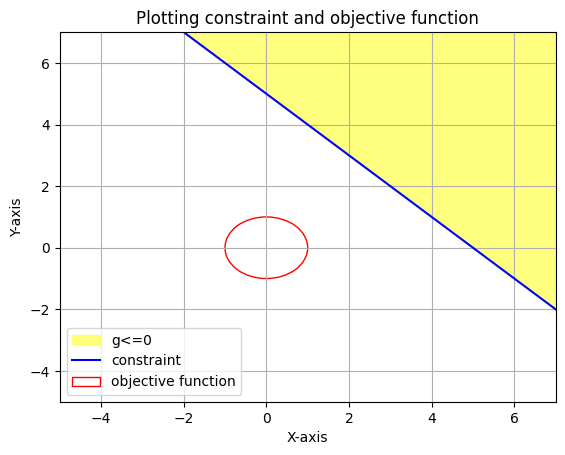

In [84]:
x = np.linspace(-5, 7, 100)
y = 5-x
circle_radius = 1.0
circle_center = (0, 0)

fig, ax = plt.subplots()
ax.fill_between(x, y, max(y), where=(y <= max(y)), color='yellow', alpha=0.5, label='g<=0')
ax.plot(x, y, label='constraint',color="blue")
circle = plt.Circle(circle_center, circle_radius, fill=False, color='red', label='objective function')
ax.add_patch(circle)
ax.set_xlim(-5, 7)
ax.set_ylim(-5, 7)

ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_title('Plotting constraint and objective function')
ax.legend(loc="lower left")
ax.grid()

plt.show()

Clearly we need to increase the value of f(x,y) such that it is atleast tangent to g(x)=0 to satisfy the constraint.

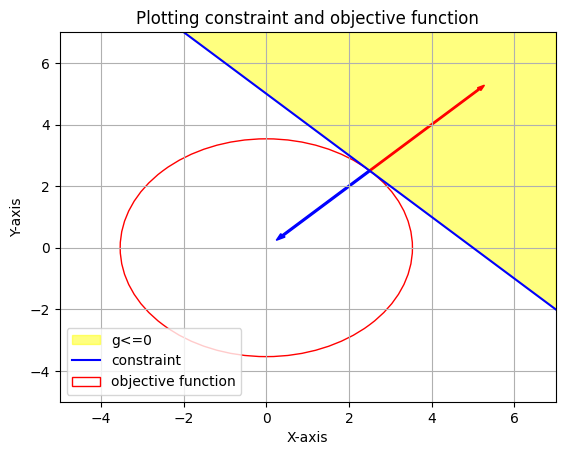

In [97]:
x = np.linspace(-5, 7, 100)
y = 5-x
circle_radius = 12.5**0.5
circle_center = (0, 0)

fig, ax = plt.subplots()
ax.fill_between(x, y, max(y), where=(y <= max(y)), color='yellow', alpha=0.5, label='g<=0')
ax.plot(x, y, label='constraint',color="blue")
circle = plt.Circle(circle_center, circle_radius, fill=False, color='red', label='objective function')
ax.add_patch(circle)
ax.set_xlim(-5, 7)
ax.set_ylim(-5, 7)

ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_title('Plotting constraint and objective function')
ax.legend(loc="lower left")
ax.grid()
plt.arrow(2.5,2.5,-2.1,-2.1,color="blue",width=0.05,label="gradient(h)")
plt.arrow(2.5,2.5,2.65,2.65,color="red",width=0.04,label="gradient(f)")
plt.show()

Notice that in this optimum situation $\mu g(\text x,\text y)=0$ and we know that at point of tangency $g(\text x,\text y)=0$. This conditon $\mu g(\text x,\text y)=0$ is called the complementary slackness condition and is always valid for all inequality constraints. If the optimal solution of the constraintless optimization already satisfies the constrainsts then in such as case $\mu$ for that constraint g is zero as applying that constraint doesn't affect the solution. Note that even in this case $\mu g(\text x,\text y)=0$ is satisfied. Another constraint in the complementary slackness condition is that $\mu_i >=0\hspace{0.1cm}\forall i\hspace{0.1cm}=1,2,\cdots n.$ for the n inequalities.

Considering only 1 inequality constraint in an optimization problem. We know that $\nabla \text f=-\mu \nabla g$. Hence, the value of $\mu$ is $\frac {-\nabla \text f}{\nabla \text g}$. As we can see in the plot above the gradients of f and g are in opposite directions and so the value of $\mu= \frac {-\nabla \text f}{\nabla \text g}$ is non-negative.

For the above example,
$\nabla \text f =\hspace{0.1cm}-\mu\nabla \text g , \begin{bmatrix} \text 2x \\ \text 2y \end{bmatrix}= -\mu \begin{bmatrix} \text -1 \\ \text -1 \end{bmatrix}$


Hence,

$$\begin{equation}\begin{split} &\text 2x=\mu \\ &\text 2y=\mu \\ &5-x-y=0 \end{split}\end{equation}$$

By symmetry of x and y we can say that x = y = 2.5 and the value of $\mu$ is 5 which is greater than zero.

Hence, we can summarize KKT conditions as follows

$\begin{equation}\begin{split} &1.\nabla_\text x \text L(\text x,\lambda,\mu)=0. \\ &2.\nabla_\lambda \text L(\text x,\lambda,\mu)=0. \\ &3.\mu_i >=0\hspace{0.1cm}\forall i\hspace{0.1cm}=1,2,\cdots n. \\ &4.\mu_i g_i(\text x,\text y)=0.\hspace{0.1cm}\forall i\hspace{0.1cm}=1,2,\cdots n. \end{split}\end{equation}$

KKT conditions are used in topics like ridge regression and support vector machines where there are constraints during optimization.

## Intuition behind Lagrange multipliers

Suppose we have an optimization problem, where we need to minimize $f(\text x)$, given inequality constraints $g_i \le 0 \hspace{0.1cm} \forall i \in [1,..,m]$. The main idea is to include the constraints in the optimization function instead of the body of the optimization model. Hence, if we denote our objective function as $J(\text x)$,

$J(\text x)=f(\text x)+\sum_{i=1}^m P(g_i)$, Here P is called a penalty function which is defined as $P(\text x)= \begin{cases} 0, \text {if} \hspace{0.1cm} \text x \le 0 \\ \infty, \text {if} \hspace{0.1cm} \text x \gt 0 \end{cases}$

So basically what the penalty function does is, if it's input is a non-positive value (inequality constraint satisfied) then it output's zero which is required as the penalty function musn't influence the optimal value of x to minimize f. But if the constraint is not satisfied or the input to the penalty function is psotive then it results in infinity which increases the cost/objective function $J$. Solving $J$ is not feasible and difficult. Also, J is not a continuous function and hence not differentiable. To solve this problem we introduce lagrange variables/multipliers $\mu_i \hspace{0.1cm} \forall i \in [1,..m]$. We define the Lagrange function $L$ as follows which will help us approximate $J$.

$L(\text x, \mu)=f(\text x)+\sum_{i=1}^m \mu_ig_i,\hspace{0.1cm} \mu_i \ge 0$. We have seen that if $\mu_i=0$ then $g_i$ doesn't affect the optimal value x.

How is  $L \hspace{0.1cm}\text{and}\hspace{0.1cm} J \hspace{0.1cm}\text {related?}$

$J(\text x)= \max_{\mu}L(\text x,\mu)$ as largest possible value of $\mu$ is $\infty$.

So to solve the optimization problem we will now minimize $J(\text x)$ in terms of x. If $\text x^*$ is our optimal solution, then

$\text x^* = min_{\text x}J(\text x)\hspace{0.1cm}=\hspace{0.1cm}min_{\text x}max_{\mu}L(\text x,\mu)-\text{primal problem}$. 

Let's try to solve this optimization problem using a different approach, let's consider a function $L^*$ such that

$\begin{equation}\begin{split} &L^*(\mu)=\hspace{0.1cm}min_{\text x}L(\text x,\mu) \\ &\text x* = \hspace{0.1cm} max_{\mu}L^*(\mu) \\ &\text x*=\hspace{0.1cm}max_{\mu}min_{\text x}L(\text x,\mu) -\text {dual problem} \end{split}\end{equation}$. 

Here we can use the concept of duality which is basically finding two different approches to solve the same problem. If we consider minimizing $f(\text x)$ in terms of x with constraints $g$ to be our primal problem the maximizing the function $L^*(\mu)$ in terms of $\mu$ will be our dual problem.

We know from the minimax inequality that if we have a function let's say $q(\text x,\text y)$ then

$min_{\text x}max_{\text y} q(\text x,\text y) \ge max_{\text y}min_{\text x}q(\text x,\text y)-\text{Weak Duality}$

Hence, in general we can say that the primal problem is greater than the dual problem.
In case we want to optimize a function which is convex in nature than this does not hold true, in that case the primal problem is equal to the dual problem like the case in support vector machines.

$min_{\text x}max_{\text y} q(\text x,\text y) = max_{\text y}min_{\text x}q(\text x,\text y)-\text{Strong Duality (for convex functions)}$